In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_random_spectra

In [17]:
np.repeat(np.random.randint(20, 150, 4), 3)

array([ 97,  97,  97, 121, 121, 121, 107, 107, 107, 127, 127, 127])

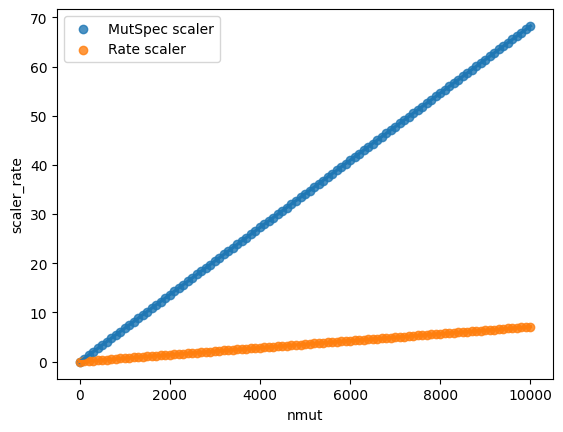

In [57]:
# nmut = 1000
ms12raw = get_random_spectra(1).rename(columns={'MutSpec': 'MutSpecInit'})
nuc_cont = np.repeat(np.random.randint(30, 250, 4), 3)

data = []
spectra = []
for nmut in np.linspace(1, 10000, 101, dtype=int):
    ms12 = ms12raw.copy()
    ms12['ExpNum'] = nuc_cont
    ms12['ObsNum'] = ms12['MutSpecInit'] * ms12['ExpNum']
    ms12['ObsNum'] = (ms12['ObsNum']/ms12['ObsNum'].sum() * nmut).astype(int)
    ms12['MutSpec'] = ms12['ObsNum'] / ms12['ExpNum']
    ms12['MutSpec'] /= ms12['MutSpec'].sum()
    ms12['Rate'] = (ms12['ObsNum'] / ms12['ObsNum'].sum()) / (ms12['ExpNum'] / ms12['ExpNum'].sum())
    spectra.append(ms12.assign(nmut=nmut))

    scaler_ms = (ms12['ObsNum'] / ms12['ExpNum']).sum()
    scaler_rate = ms12['ObsNum'].sum() / ms12['ExpNum'].sum()
    
    data.append({
        'nmut': nmut,
        'scaler_ms': scaler_ms,
        'scaler_rate': scaler_rate,
    })
df = pd.DataFrame(data)
spectra = pd.concat(spectra)

sns.regplot(data=df, x='nmut', y='scaler_ms', label='MutSpec scaler')
sns.regplot(data=df, x='nmut', y='scaler_rate', label='Rate scaler')
plt.legend()

In [58]:
df

,nmut,scaler_ms,scaler_rate
0,1,0.000000,0.000000
1,100,0.613756,0.067376
2,200,1.290180,0.137589
3,300,1.964628,0.207801
4,400,2.677934,0.280142
...,...,...,...
96,9600,65.558620,6.804965
97,9700,66.213998,6.875177
98,9800,66.874946,6.945390
99,9900,67.573203,7.016312


In [59]:
spectra.pivot(index='nmut', columns='Mut', values='Rate')

Mut,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G
nmut,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,0.140683,3.657770,0.070342,0.123684,0.123684,3.463158,1.224091,0.153011,0.153011,0.000000,0.000000,0.000000
200,0.137783,3.582352,0.103337,0.121134,0.121134,3.391753,1.198852,0.224785,0.149857,0.173049,0.173049,0.000000
300,0.136842,3.557899,0.114035,0.120307,0.160410,3.368601,1.190669,0.198445,0.148834,0.229157,0.229157,0.000000
400,0.152259,3.518867,0.118423,0.148734,0.148734,3.331646,1.177607,0.220801,0.147201,0.254973,0.254973,0.084991
...,...,...,...,...,...,...,...,...,...,...,...,...
9600,0.154613,3.489925,0.130237,0.154299,0.164096,3.302736,1.165008,0.222700,0.157556,0.311397,0.297402,0.083972
9700,0.155102,3.490130,0.130285,0.153935,0.164844,3.302945,1.165106,0.221925,0.157447,0.311680,0.294365,0.083115
9800,0.154898,3.490330,0.130333,0.154779,0.164378,3.303150,1.165202,0.222650,0.157339,0.308529,0.294817,0.082275


In [61]:
spectra.pivot(index='nmut', columns='Mut', values='Rate').reset_index().corr().loc['nmut']

Mut
nmut    1.000000
A>C     0.494651
A>G    -0.478060
A>T     0.378472
C>A     0.494264
C>G     0.425425
C>T    -0.432740
G>A    -0.429844
G>C     0.395050
G>T     0.654250
T>A     0.377417
T>C     0.364986
T>G     0.482575
Name: nmut, dtype: float64

In [62]:
spectra.pivot(index='nmut', columns='Mut', values='MutSpec').reset_index().corr().loc['nmut']

Mut
nmut    1.000000
A>C     0.469030
A>G    -0.443186
A>T     0.365262
C>A     0.487711
C>G     0.409105
C>T    -0.421894
G>A    -0.421841
G>C     0.367269
G>T     0.562411
T>A     0.368018
T>C     0.354861
T>G     0.478321
Name: nmut, dtype: float64